In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dataset

In [6]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## combining independent dataset into one

In [15]:
X=df.iloc[:,:-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


## Dependent dataset

In [14]:
Y=df.iloc[:,4:]
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Change categorical values into numerical values

In [17]:
states=pd.get_dummies(X['State'],drop_first=True)

In [18]:
states

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


## drop State

In [19]:
X=X.drop('State',axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


## Now again add new numerical column to X

In [20]:
X=pd.concat([X,states],axis=1)

In [21]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


# dataset is ready for training

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
LR=LinearRegression()

In [35]:
LR.fit(X_train,Y_train)
y_pred=LR.predict(X_test)

In [44]:
score=r2_score(Y_test,y_pred)
print(score)

0.9783259006628308


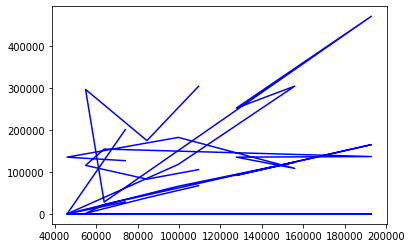

In [47]:
plt.plot(y_pred,X_test,'blue')